# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


In [49]:
print(len(cities))

578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = # YOUR CODE HERE
        city_lng = # YOUR CODE HERE
        city_max_temp = # YOUR CODE HERE
        city_humidity = # YOUR CODE HERE
        city_clouds = # YOUR CODE HERE
        city_wind = # YOUR CODE HERE
        city_country = # YOUR CODE HERE
        city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | farsund
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lanzhou
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | colorado
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | trairi
Processing Record 15 of Set 1 | dobryanka
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | avarua
Processing Record 23 of

Processing Record 33 of Set 4 | belmonte
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | ambilobe
Processing Record 36 of Set 4 | aripuana
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | lesnoy
Processing Record 40 of Set 4 | evensk
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | danielskuil
Processing Record 44 of Set 4 | chunhuhub
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | ouallam
Processing Record 47 of Set 4 | challapata
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | olafsvik
Processing Record 0 of Set 5 | neepawa
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | ugra
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [57]:
# trial code for ^

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
#                           "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | kurumkan
Processing Record 6 of Set 1 | verkhnevilyuysk
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | zaozersk
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | bandarbeyla
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | gillette
Processing Record 15 of Set 1 | port blair
Processing Record 16 of Set 1 | boende
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | la passe
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | chonchi
Processing Record 21 of Set 1 | gangtok
Proce

Processing Record 39 of Set 4 | hami
Processing Record 40 of Set 4 | kuanda
Processing Record 41 of Set 4 | goure
Processing Record 42 of Set 4 | cole harbour
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | tutoia
Processing Record 45 of Set 4 | puerto deseado
Processing Record 46 of Set 4 | lihue
Processing Record 47 of Set 4 | rikaze
Processing Record 48 of Set 4 | hammerfest
Processing Record 49 of Set 4 | alo
Processing Record 0 of Set 5 | ola
Processing Record 1 of Set 5 | touros
Processing Record 2 of Set 5 | horta
Processing Record 3 of Set 5 | kerikeri
Processing Record 4 of Set 5 | livingston
Processing Record 5 of Set 5 | san pedro garza garcia
Processing Record 6 of Set 5 | mushie
Processing Record 7 of Set 5 | zakynthos
Processing Record 8 of Set 5 | broken hill
Processing Record 9 of Set 5 | christchurch
Processing Record 10 of Set 5 | aasiaat
Processing Record 11 of Set 5 | east london
Processing Record 12 of Set 5 | afaahiti
Processing Record 1

Processing Record 33 of Set 8 | tselina
Processing Record 34 of Set 8 | tenno
Processing Record 35 of Set 8 | bardai
Processing Record 36 of Set 8 | bocaiuva
Processing Record 37 of Set 8 | sault ste. marie
Processing Record 38 of Set 8 | simpang
Processing Record 39 of Set 8 | nova sintra
Processing Record 40 of Set 8 | lanxi
Processing Record 41 of Set 8 | canutama
Processing Record 42 of Set 8 | sao felix do xingu
Processing Record 43 of Set 8 | sao jose da coroa grande
Processing Record 44 of Set 8 | timbuktu
Processing Record 45 of Set 8 | pathein
Processing Record 46 of Set 8 | alotau
City not found. Skipping...
Processing Record 47 of Set 8 | neryungri
Processing Record 48 of Set 8 | mairipora
Processing Record 49 of Set 8 | katsuura
Processing Record 0 of Set 9 | daru
Processing Record 1 of Set 9 | rongelap
Processing Record 2 of Set 9 | mangai
Processing Record 3 of Set 9 | ishigaki
Processing Record 4 of Set 9 | gornopravdinsk
Processing Record 5 of Set 9 | hasaki
Processing 

Processing Record 26 of Set 12 | alamo
Processing Record 27 of Set 12 | yung shue wan
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [58]:
# trial code ^

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [59]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,hawaiian paradise park,19.5933,-154.9731,21.69,96,100,3.60,1709839108
1,talnakh,69.4865,88.3972,-20.91,97,99,0.66,1709839108
2,port-aux-francais,-49.3500,70.2167,7.71,91,100,15.35,1709839110
3,grytviken,-54.2811,-36.5092,3.61,87,99,1.67,1709839111
4,kurumkan,54.3000,110.3000,-14.37,93,98,2.24,1709839111


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [61]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.69,96,100,3.60,1709839108
1,talnakh,69.4865,88.3972,-20.91,97,99,0.66,1709839108
2,port-aux-francais,-49.3500,70.2167,7.71,91,100,15.35,1709839110
3,grytviken,-54.2811,-36.5092,3.61,87,99,1.67,1709839111
4,kurumkan,54.3000,110.3000,-14.37,93,98,2.24,1709839111


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

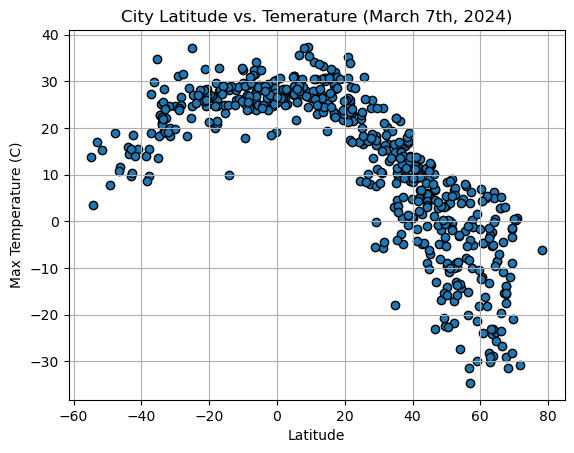

In [62]:
# trial code

# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temerature (March 7th, 2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

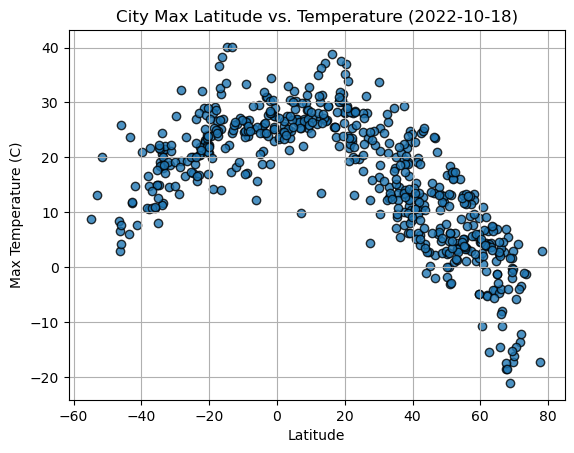

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

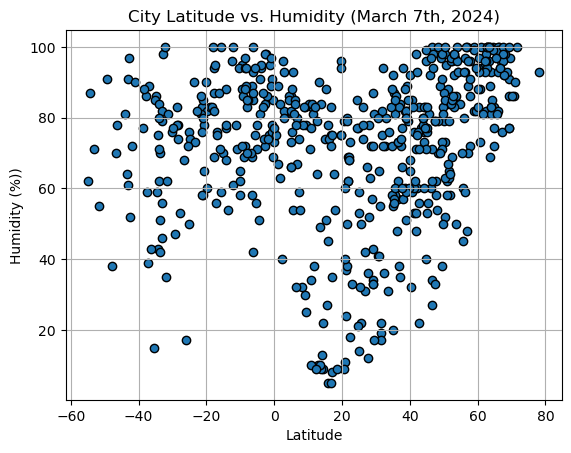

In [63]:
# trial code

# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (March 7th, 2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

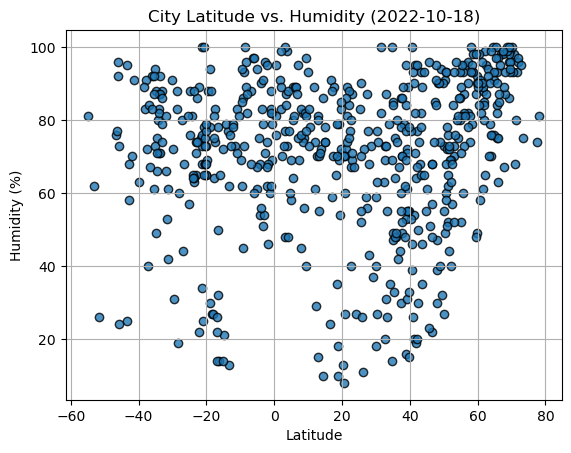

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

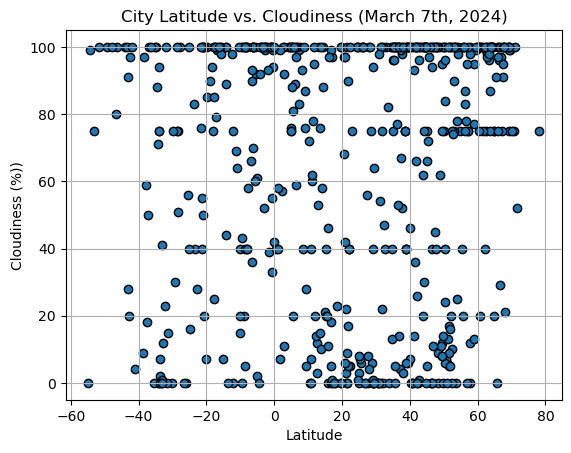

In [64]:
# trial code

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (March 7th, 2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

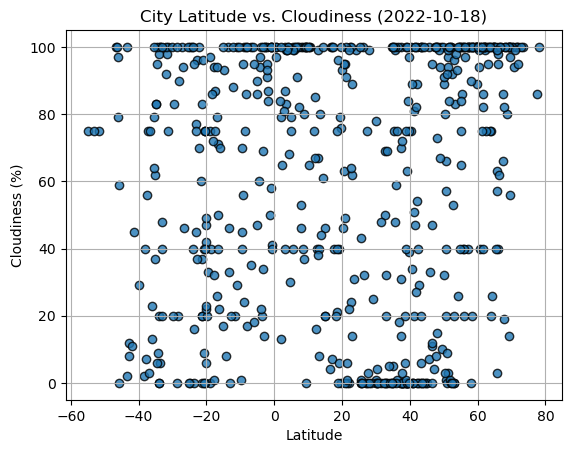

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

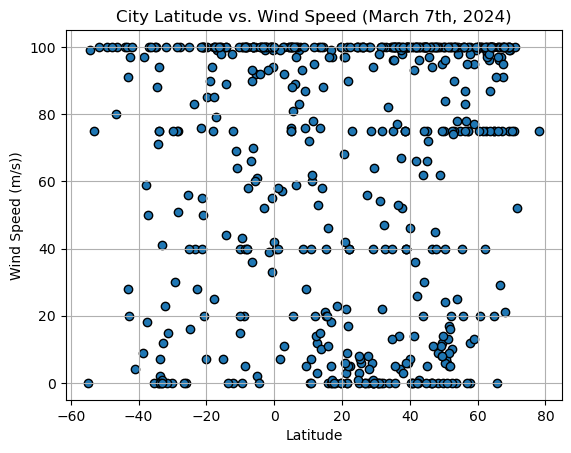

In [65]:
# trial code

# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (March 7th, 2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s))")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

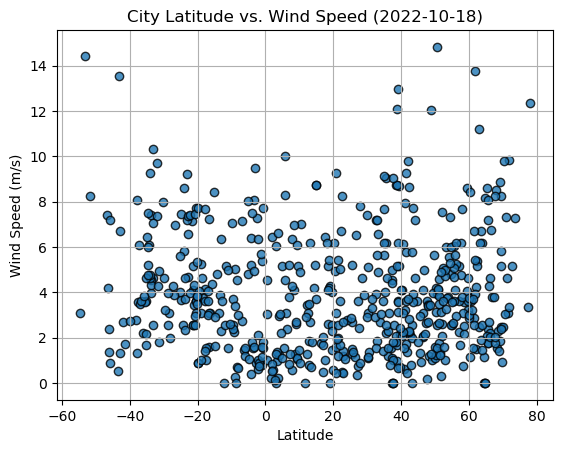

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


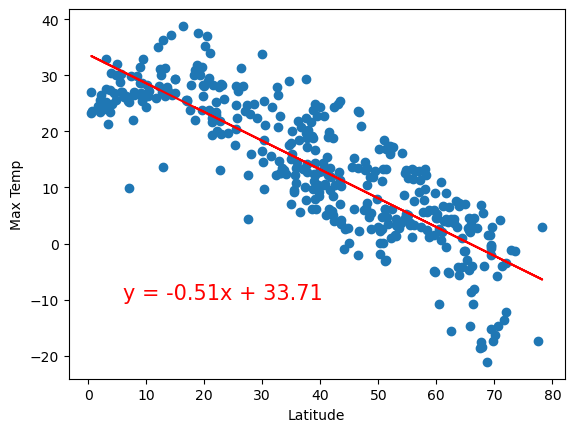

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


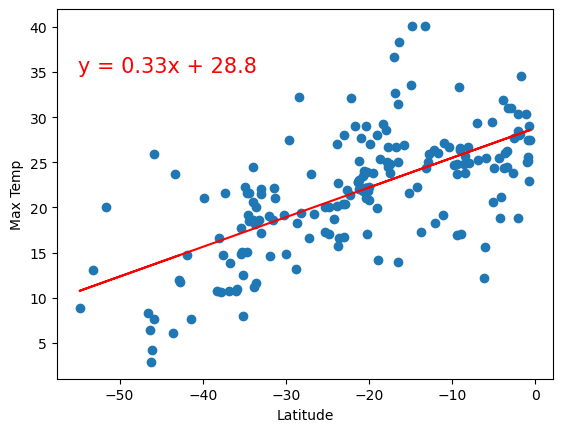

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


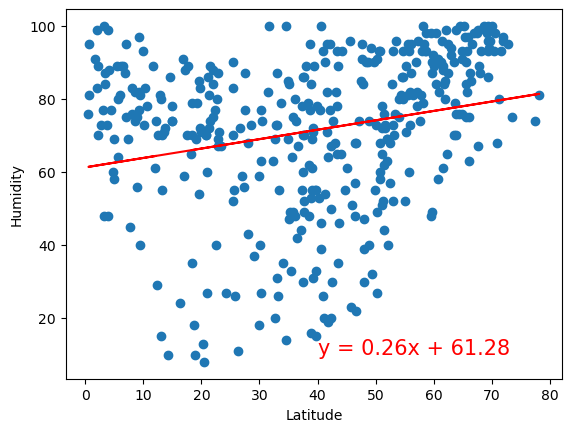

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


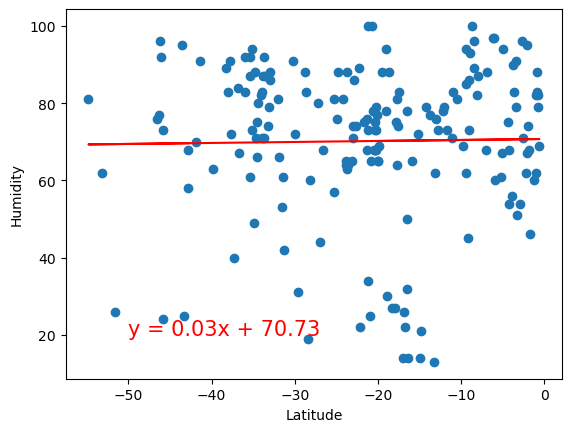

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


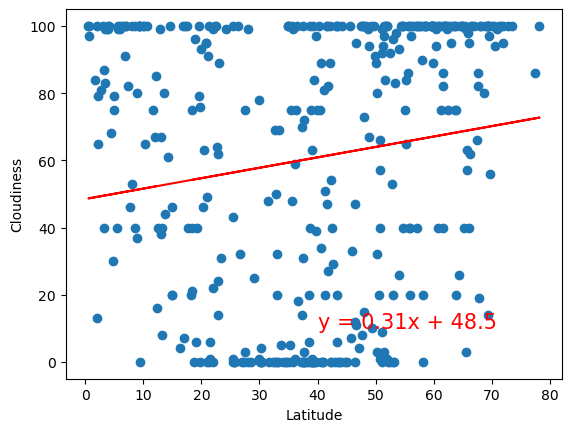

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


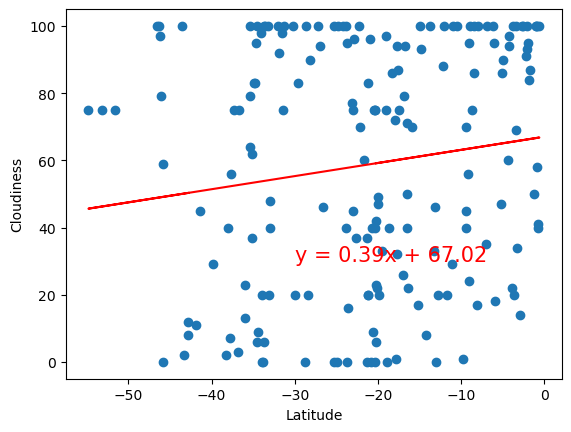

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


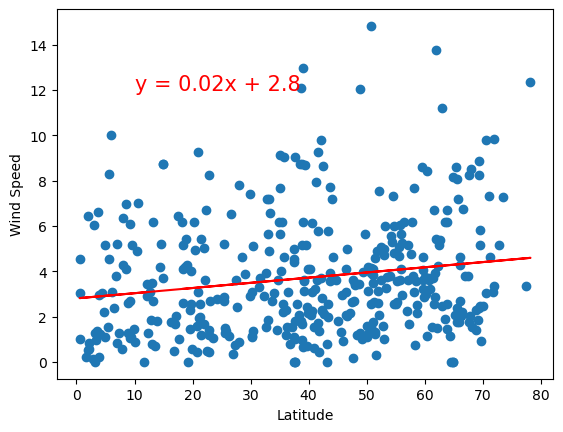

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


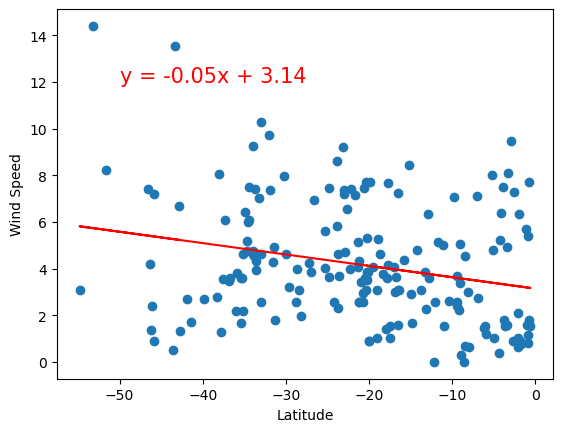

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE